#### <strong>第一次作品：主成分分析實作</strong>
學號：711233117

姓名：楊廷紳
<hr>

 <font color=skyblue>作品目標</font>：透過程式實作學習主成分分析的分析概念與原理

### 習題1

有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。利用這組資料回答下列問題：

1. 繪製變數間的相關係數圖，以觀察變數間是否存在相關性。

In [2]:
import pandas as pd

# 讀取xlsx文件
wine = pd.read_excel('C:\shallow_ml\data\wine.xlsx')
print(wine.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     105

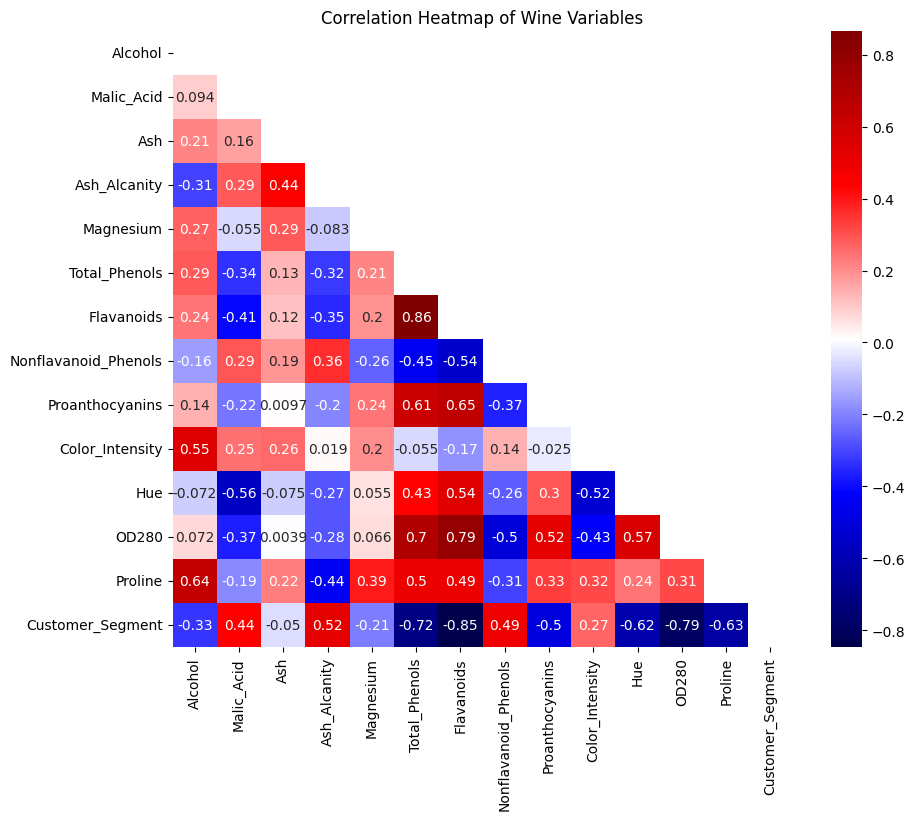

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

categories = wine.columns

df = pd.DataFrame(wine, columns=categories)
R = df.corr()
mask = np.triu(np.ones_like(R, dtype=bool))  # diagonal mask

plt.figure(figsize=(10, 8)) 
sns.heatmap(R, annot=True, mask=mask, cmap='seismic')  # Using 'Spectral' colormap for vibrant colors

plt.title('Correlation Heatmap of Wine Variables')
plt.show()

**<font color=yellow>對 1. 執行結果的觀察紀錄：</font>**
- 載入資料透過 wine.xlsx 檔，13 種化學成分和 1 個來自不同酒廠的類別變數 Customer_Segment 。
- 相關係數矩陣為對稱矩陣，因此僅呈現下半部。
- 具較高正相關(約0.8)的變數間的有 Flavanoids 和 Total_Phenols 、 OD280。(Flavanoids 為類黃酮、Total_Phenols 為總多酚含量、OD280 為蛋白質的吸光度)
- 在酒廠的分類的類別變數在這裡被當作有次序的變數，所以來自類別3的酒廠，代表 Flavanoids 的成分量可能越少，為高度負相關。

2. 繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考。

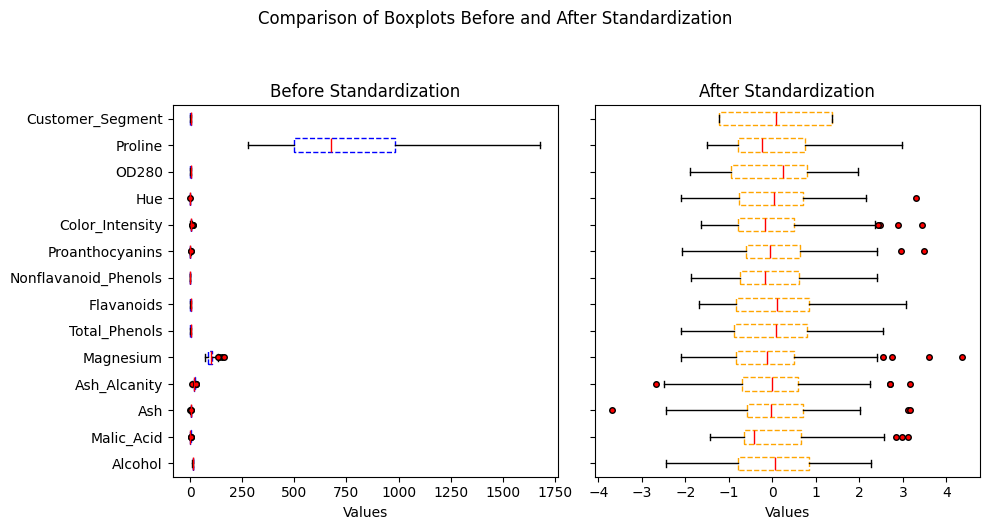

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

ratings = np.array(wine)

# Standardize the ratings
scaler = StandardScaler()
ratings_ = scaler.fit_transform(ratings)

# Get category names
categories = df.columns

# Plotting both boxplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Boxplot before standardization
boxprops_before = dict(linestyle='--', linewidth=1, color='blue')  # Change box to dashed blue
flierprops_before = dict(marker='o', markerfacecolor='red', markersize=4, linestyle='none')  # Change fliers to red circles
medianprops_before = dict(color='red')  # Change median line color to red
axes[0].boxplot(ratings, boxprops=boxprops_before, flierprops=flierprops_before, medianprops=medianprops_before, labels=categories, vert=False)
axes[0].set_xlabel('Values')
axes[0].set_title('Before Standardization')

# Boxplot after standardization
boxprops_after = dict(linestyle='--', linewidth=1, color='orange')  # Change box to dashed blue
flierprops_after = dict(marker='o', markerfacecolor='red', markersize=4, linestyle='none')  # Change fliers to red circles
medianprops_after = dict(color='red')  # Change median line color to red
axes[1].boxplot(ratings_, boxprops=boxprops_after, flierprops=flierprops_after, medianprops=medianprops_after, labels=categories, vert=False)
axes[1].set_xlabel('Values')
axes[1].set_title('After Standardization')

# Hide y-axis labels for the plot on the right side
axes[1].set_yticklabels([])

# Adding a title to the entire figure
plt.suptitle('Comparison of Boxplots Before and After Standardization', y=1.05)

plt.tight_layout()
plt.show()

**<font color=yellow>對 2. 執行結果的觀察紀錄：</font>**
- 影響其他變數需要標準化的變數為 Proline (脯胺酸)。
- 標準化後觀察盒鬚圖，Magnesium 變數具最大的離群值，而 Ash 具最大範圍的離群值。

3. 進行主成分分析，繪製特徵值由大而小的分布與 scree plot。

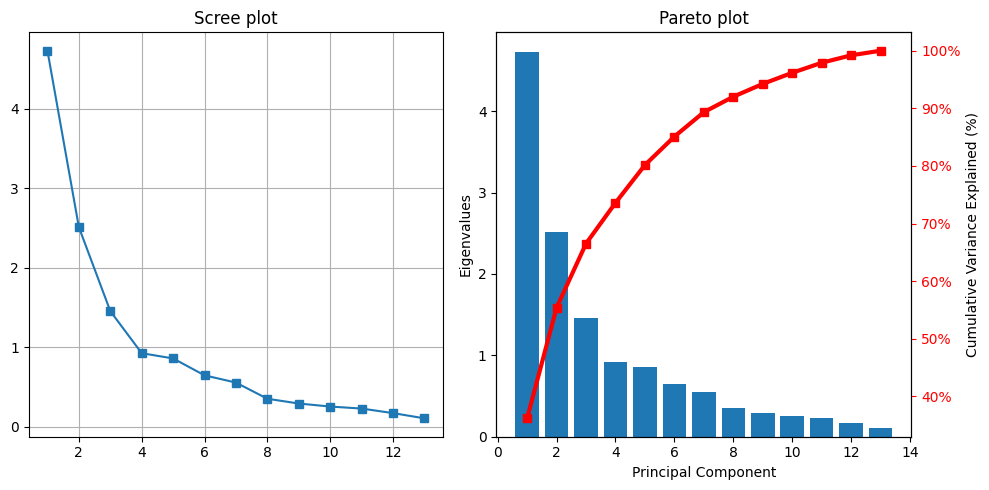

In [5]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Assuming you already have defined ratings_ and calculated s_x_npfun
s_x_npfun = np.cov(ratings_[:, 0:13].T, bias=False)
w, v = eig(s_x_npfun)
idx = np.argsort(w)[::-1]
eigvals = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with two subplots

# Scree plot
x = np.arange(1, 1+len(eigvals))
ax1.plot(x, eigvals, marker='s')
ax1.set_title('Scree plot')
ax1.grid(True)

# Pareto plot
ax2.bar(x, eigvals)
ax3 = ax2.twinx()
ax3.plot(x, eigvals.cumsum()/eigvals.sum()*100,
         marker='s', color='red', lw=3)
ax3.tick_params(axis='y', colors='red')
ax3.yaxis.set_major_formatter(PercentFormatter())
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Eigenvalues')
ax3.set_ylabel('Cumulative Variance Explained (%)')
ax2.set_title('Pareto plot')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**<font color=yellow>對 3. 執行結果的觀察紀錄：</font>**
- 左圖為階梯圖。可以解釋為當主成分取的越多時，所能解釋的變異量將越少。約取到第四個主成分時，後續能解釋的變異量趨於平緩。
- 右圖為解釋變異量的累積百分比。代表需要取到約第五個主成分時，才能解釋到 80% 的變異量。

4. 資料中的每支酒都有標籤（label），代表來自哪個酒莊。假設先不看這項標籤，利用主成分分析取得前兩項成分，並繪製其散布圖。是否可以從兩個主成分的散布圖中看出三個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察做與不做標準化的差別。

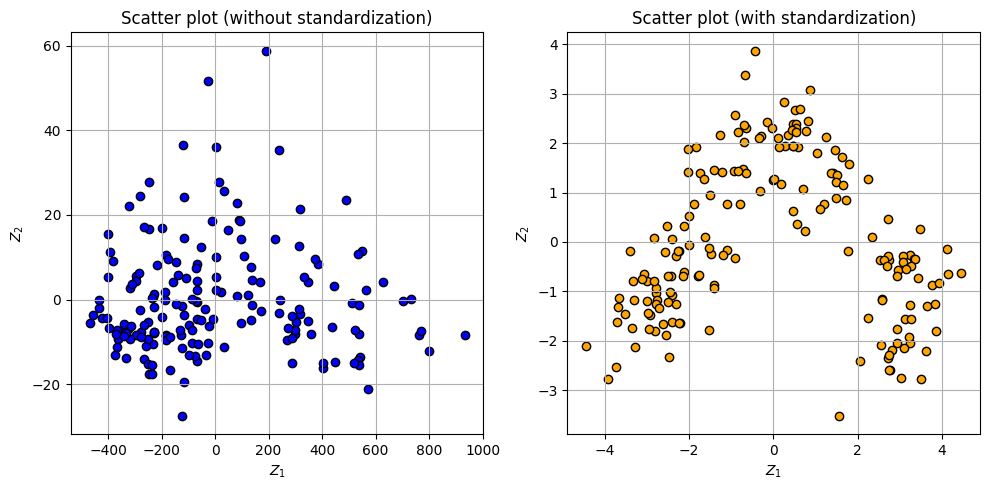

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Before standardization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(wine)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(principal_components[:, 0], principal_components[:, 1], edgecolor='black',color='blue')  # Adding black outline
plt.title('Scatter plot (without standardization)')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.grid(True)

# After standardization
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(wine_scaled)

plt.subplot(1, 2, 2)
plt.scatter(principal_components[:, 0], principal_components[:, 1], edgecolor='black' ,color='orange')  # Adding black outline
plt.title('Scatter plot (with standardization)')
plt.xlabel('$Z_1$')  # 1st principal component
plt.ylabel('$Z_2$')  # 2nd principal component
plt.grid(True)

plt.tight_layout()
plt.show()

**<font color=yellow>對 4. 執行結果的觀察紀錄：</font>**
- 去除掉 Customer_Segement 的標籤變數後進行主成分分析。未經標準化的前兩個主成分的散布圖難看出分群，但經標準化後較明顯，散布點較少重疊的部分。
- 推測經過標準化，能更好辨別主成分間的特徵。

5. 再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色。

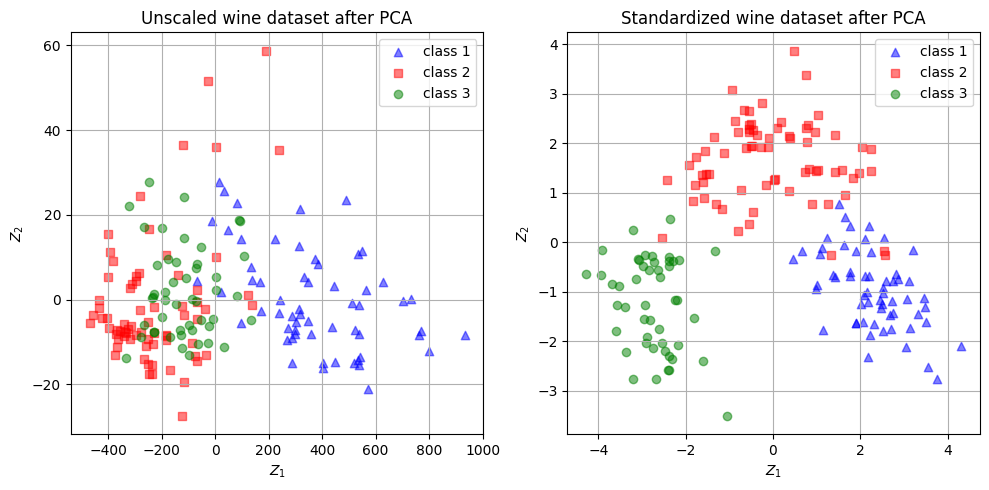

In [7]:
import pandas as pd
from sklearn.decomposition import PCA

wine_labels = wine['Customer_Segment'] #python 不要以相同名稱覆蓋當作
wine = wine.drop(columns=['Customer_Segment'], errors='ignore')

scaler = StandardScaler().set_output(transform="pandas")
scaled_wine = scaler.fit_transform(wine)
pca = PCA(n_components=2).fit(wine)
scaled_pca = PCA(n_components=2).fit(scaled_wine)
wine_transformed = pca.transform(wine)
wine_std_transformed = scaled_pca.transform(scaled_wine)


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
target_classes = range(1, 4)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=wine_transformed[wine_labels == target_class, 0],
        y=wine_transformed[wine_labels == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=wine_std_transformed[wine_labels == target_class, 0],
        y=wine_std_transformed[wine_labels == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )
ax1.set_title("Unscaled wine dataset after PCA")
ax2.set_title("Standardized wine dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("$Z_1$")
    ax.set_ylabel("$Z_2$")
    ax.legend(loc="upper right")
    ax.grid()

_ = plt.tight_layout()
plt.show()

**<font color=yellow>對 5. 執行結果的觀察紀錄：</font>**
- 依據原本標籤變數加入顏色後，可以發現顏色重疊的部分較少，代表對於經標準化後，也能透過標籤變數判別主成分的特徵。

6. 如果採三個主成分，並繪製立體圖。觀察圖是否比第 5 題具備更好的群組分辨能力。嘗試旋轉立體圖的角度以取得最好的辨別視野。

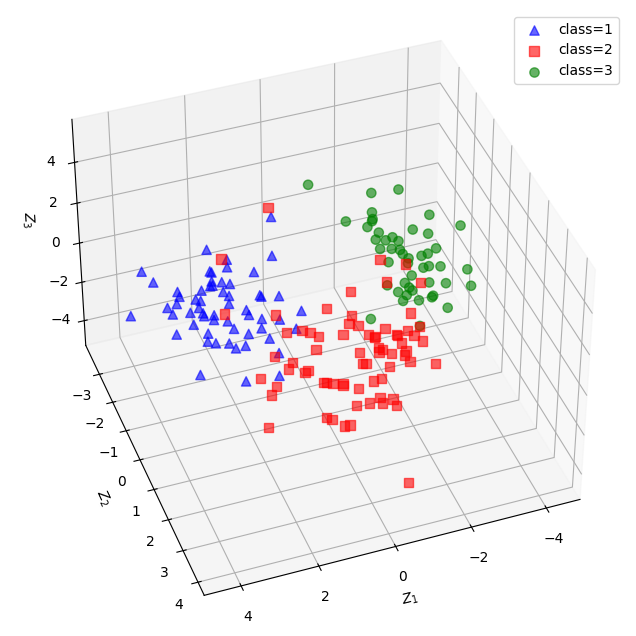

In [8]:
wine = pd.read_excel('C:\shallow_ml\data\wine.xlsx')
wine_array = np.array(wine)

scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(wine_array)
# Apply transform to dataset.
ratings_ = scaler.transform(wine_array)
Sx = np.cov(ratings_[:, 0:13].T)
w, v = eig(Sx)
idx = np.argsort(w)[::-1]
eigvals = w[idx]
eigvecs = v[:, idx]
Z = eigvecs.T @ ratings_[:, 0:13].T

pca_fit = PCA().fit_transform(ratings_[:, 0:13])

# 定義座標軸
fig = plt.figure(figsize=(11, 8))
ax = plt.axes(projection='3d')
# 設置視圖角度
ax.view_init(elev=40, azim=70)  # 設置仰角為 20 度，方位角為 45 度

colors = ("blue", "red", "green")
markers = ("^", "s", "o")
labels = wine.iloc[:, -1].unique()

for i, label in enumerate(labels):
    mask = wine.iloc[:, -1] == label
    ax.scatter(pca_fit[mask, 0], pca_fit[mask, 1], pca_fit[mask, 2], alpha=0.6, label="class={}".format(
        i+1), color=colors[i], marker=markers[i], s=45)  # 生成散點.利用c控制顏色序列,s控制大小
ax.set_xlabel('$Z_1$')
ax.set_ylabel('$Z_2$')
ax.set_zlabel('$Z_3$')
ax.legend()
plt.show()


**<font color=yellow>對 6. 執行結果的觀察紀錄：</font>**
- 當採取三個主成分時，資料僅管在二維平面上重疊，擴展到三維後，資料點的特徵更好辨別。
- 由立體圖能推測，當取越多的主成分時，投影的維度也就越多。而將所有變數只投影到一個平面上為維度縮減的概念。
- 所以由前面第二小題與此題的分析可知，雖然取的主成分越多，能解釋到的變異、特徵越多，但取過多的主成分對於解釋並無太大的幫助。

7. $Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。

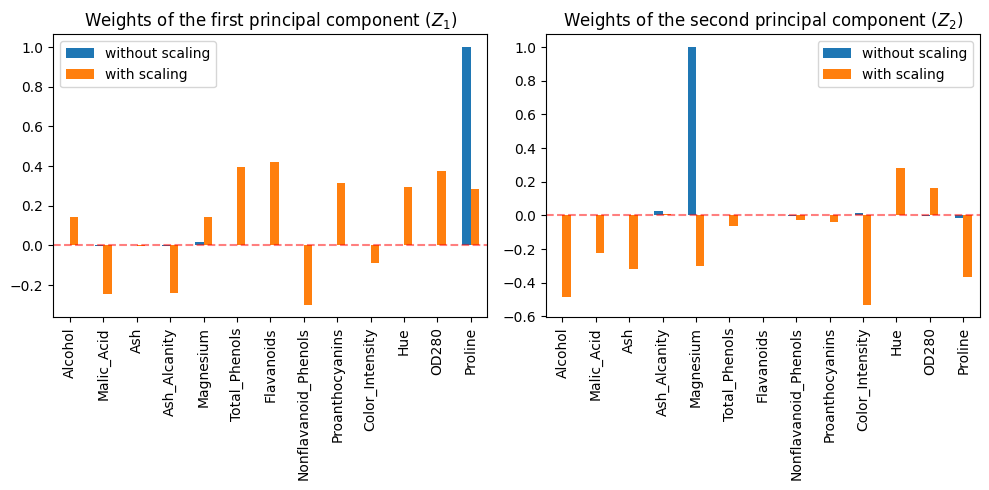

In [9]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have defined pca and scaled_pca variables
wine = wine.drop(columns=['Customer_Segment'], errors='ignore')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))  # Creating a subplot with one row and two columns

# First principal component plot
first_pca_component = pd.DataFrame(
    pca.components_[0], index=wine.columns, columns=["without scaling"])
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component.plot.bar(
    ax=axes[0], title="Weights of the first principal component ($Z_1$)", legend=True)

# Adding semi-transparent red line at y=0
axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.5)

# Second principal component plot
second_pca_component = pd.DataFrame(
    pca.components_[1], index=wine.columns, columns=["without scaling"])
second_pca_component["with scaling"] = scaled_pca.components_[1]
second_pca_component.plot.bar(
    ax=axes[1], title="Weights of the second principal component ($Z_2$)", legend=True)

# Adding semi-transparent red line at y=0
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()  # Automatically adjust subplot parameters
plt.show()

In [10]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 標準化 wine 資料
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine)

# 使用 PCA 模型擬合標準化後的資料
pca.fit(wine_scaled)

# 提取經標準化後的第一和第二主成分的變數權重
PC1_weights = pca.components_[0]
PC2_weights = pca.components_[1]

# 將權重轉換為 DataFrame
weights_df = pd.DataFrame({'PC1_weights': PC1_weights, 'PC2_weights': PC2_weights}, index=wine.columns)

# 顯示結果
print("經標準化後的第一主成分和第二主成分的變數權重:")
print(weights_df)

經標準化後的第一主成分和第二主成分的變數權重:
                      PC1_weights  PC2_weights
Alcohol                  0.144329    -0.483652
Malic_Acid              -0.245188    -0.224931
Ash                     -0.002051    -0.316069
Ash_Alcanity            -0.239320     0.010591
Magnesium                0.141992    -0.299634
Total_Phenols            0.394661    -0.065040
Flavanoids               0.422934     0.003360
Nonflavanoid_Phenols    -0.298533    -0.028779
Proanthocyanins          0.313429    -0.039302
Color_Intensity         -0.088617    -0.529996
Hue                      0.296715     0.279235
OD280                    0.376167     0.164496
Proline                  0.286752    -0.364903


In [11]:
# 將權重的絕對值排序
sorted_PC1_weights = weights_df['PC1_weights'].abs().sort_values(ascending=False)
sorted_PC2_weights = weights_df['PC2_weights'].abs().sort_values(ascending=False)

# 列印排序後的結果
print("經標準化後的第一主成分的變數權重 (絕對值由大到小):")
print(sorted_PC1_weights)

print("\n經標準化後的第二主成分的變數權重 (絕對值由大到小):")
print(sorted_PC2_weights)

經標準化後的第一主成分的變數權重 (絕對值由大到小):
Flavanoids              0.422934
Total_Phenols           0.394661
OD280                   0.376167
Proanthocyanins         0.313429
Nonflavanoid_Phenols    0.298533
Hue                     0.296715
Proline                 0.286752
Malic_Acid              0.245188
Ash_Alcanity            0.239320
Alcohol                 0.144329
Magnesium               0.141992
Color_Intensity         0.088617
Ash                     0.002051
Name: PC1_weights, dtype: float64

經標準化後的第二主成分的變數權重 (絕對值由大到小):
Color_Intensity         0.529996
Alcohol                 0.483652
Proline                 0.364903
Ash                     0.316069
Magnesium               0.299634
Hue                     0.279235
Malic_Acid              0.224931
OD280                   0.164496
Total_Phenols           0.065040
Proanthocyanins         0.039302
Nonflavanoid_Phenols    0.028779
Ash_Alcanity            0.010591
Flavanoids              0.003360
Name: PC2_weights, dtype: float64


**<font color=yellow>對 7. 執行結果的觀察紀錄：</font>**
- 影響變數幅度導致需要標準化的為 Proline 和 Magnesium 變數。
- 第一主成分經絕對值得變數權重，較重要的變數為 Flavanoids、Total_Phenols；較不重要的為 Color_Intensity、Ash。
- 第一主成分經絕對值得變數權重，較重要的變數為 Color_Intensity、Alcohol；較不重要的為 Ash_Alcanity、Flavanoids。
- 與相關係數圖做比較，兩個主成分間重要與不重要的變數間相關性都不強。

<hr>

### 習題2
回答類似習題 1 的問題，資料則是同樣來自 sklearn.datasets 的一組關於乳癌患者腫瘤的影像量測資料。量測變數共 30 個，樣本數為 569 位患者，區分為兩個群組，分別是 Malignant（惡性腫瘤）與 Benign（良性腫瘤）。請注意，由於變數多，因此如前一練習的相關性圖，必須做些改變。

1. 繪製變數間的相關係數圖，以觀察變數間是否存在相關性

In [12]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data)

# 載入乳腺癌資料集
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 將特徵資料與目標值結合
df = pd.concat([X, pd.DataFrame({'target': y})], axis=1)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

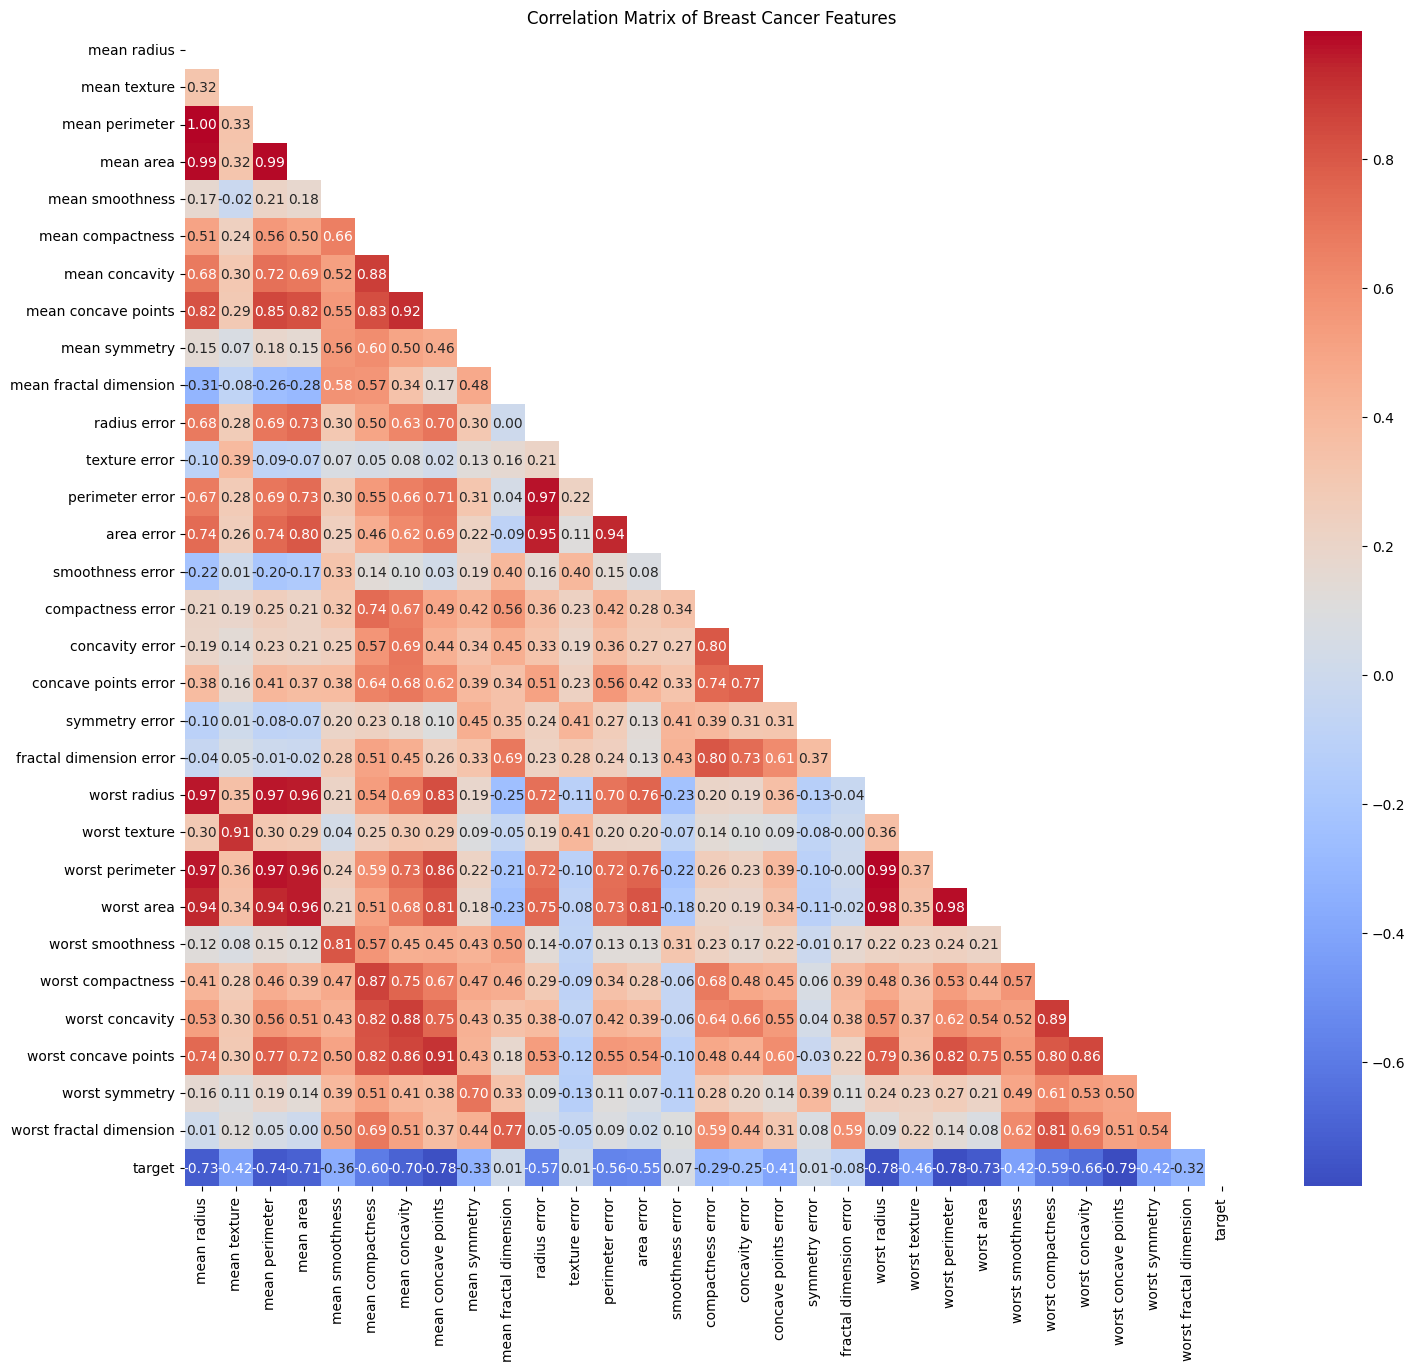

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# 計算特徵之間的相關係數
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # diagonal mask

# 繪製相關係數圖
plt.figure(figsize=(17, 15))
sns.heatmap(correlation_matrix ,mask=mask , annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Breast Cancer Features')
plt.show()

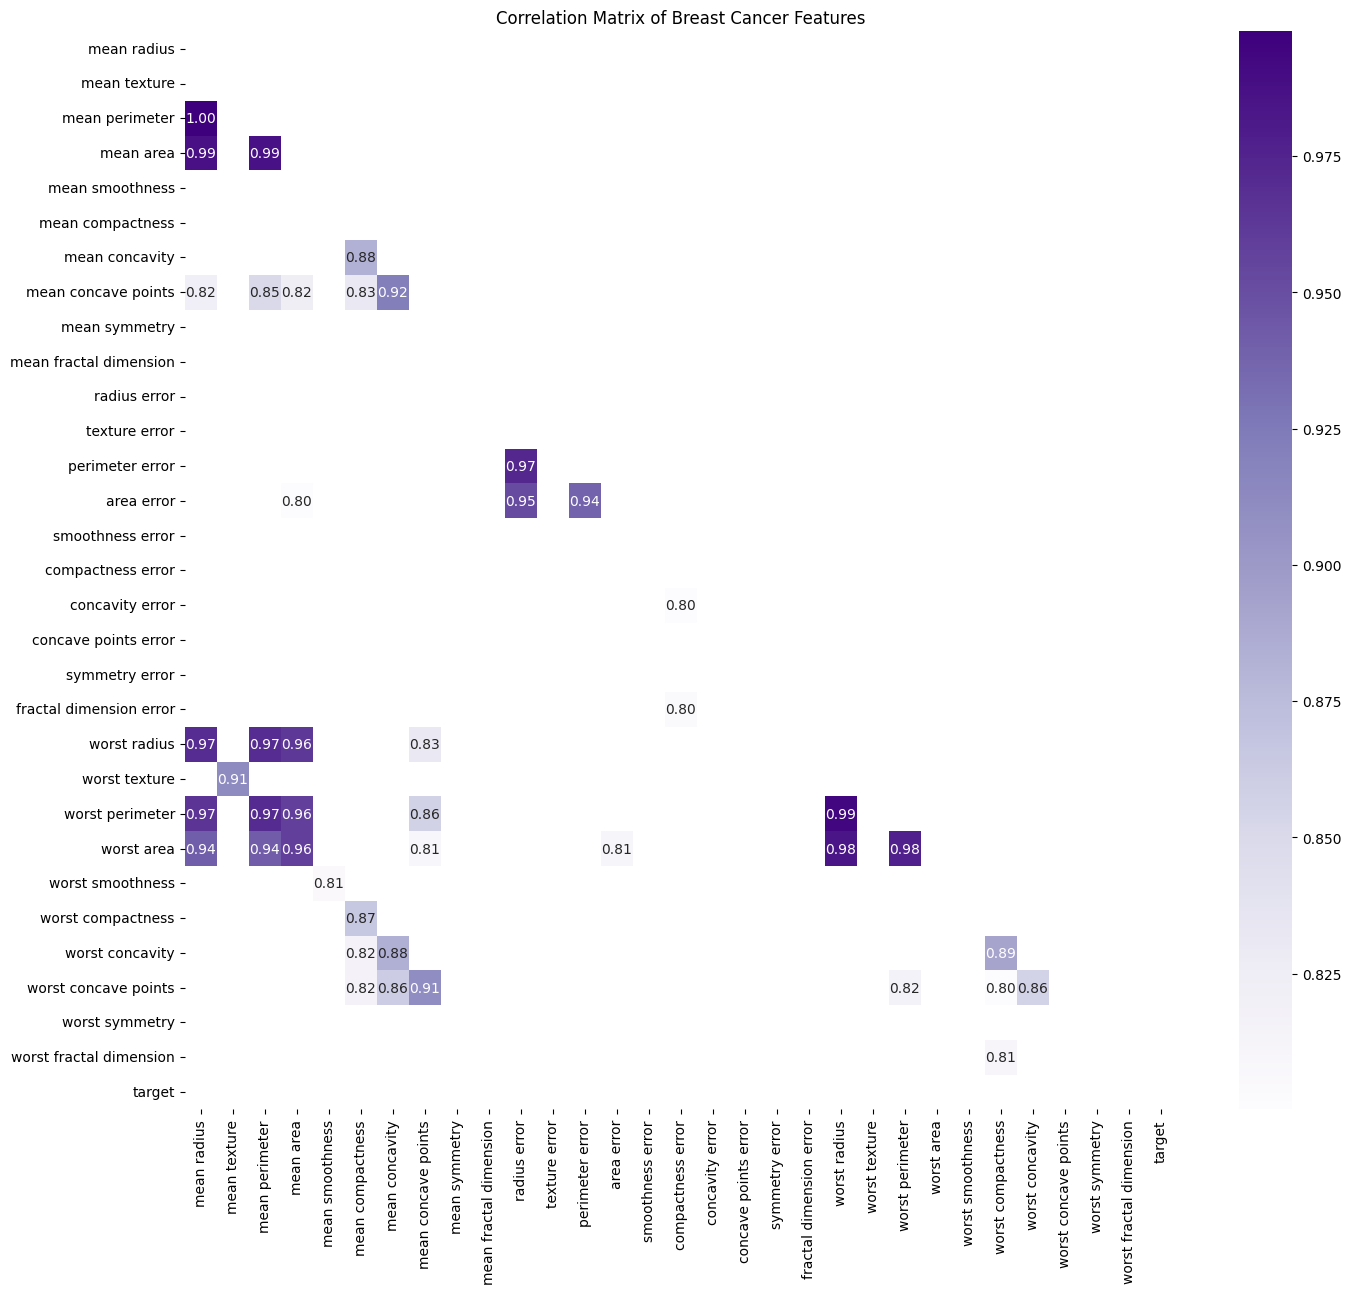

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# 計算特徵之間的相關係數
correlation_matrix = df.corr()
high_corr = correlation_matrix[abs(correlation_matrix) > 0.8]
mask = np.triu(np.ones_like(high_corr, dtype=bool))  # diagonal mask

# 繪製相關係數圖
plt.figure(figsize=(16, 14))
sns.heatmap(high_corr ,mask=mask , annot=True, cmap='Purples', fmt=".2f")
plt.title('Correlation Matrix of Breast Cancer Features')
plt.show()

**<font color=orange>對 1. 執行結果的觀察紀錄：</font>**
- 由於變數過多導致相關係數圖過於複雜，篩選出相關係數加上絕對值大於 0.8 的變數。
- 篩選完後，colormap 在視覺化表達方面盡量使用單一色相，才不會誤解正負相關性。

2. 繪製一張含每個量測變數的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考（如上題繪製的兩張 Boxplot 圖, 一張針對原始資料，另一張則是標準化後的資料）。

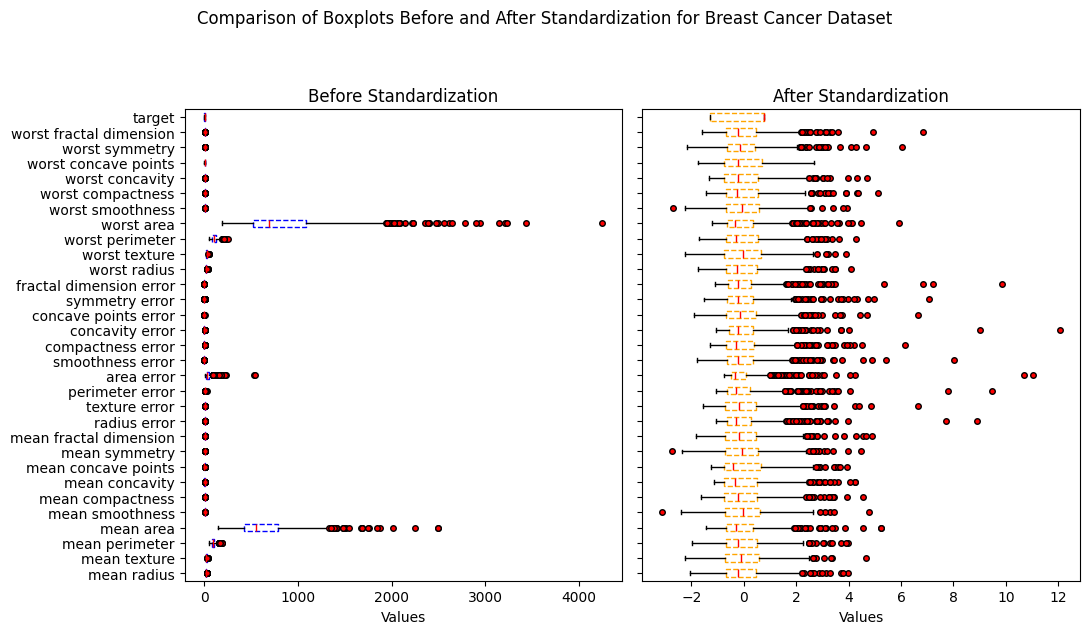

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

ratings = np.array(df)

# Standardize the ratings
scaler = StandardScaler()
ratings_ = scaler.fit_transform(ratings)

# Get category names
categories = df.columns

# Plotting both boxplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))

# Boxplot before standardization
boxprops_before = dict(linestyle='--', linewidth=1, color='blue')  # Change box to dashed blue
flierprops_before = dict(marker='o', markerfacecolor='red', markersize=4, linestyle='none')  # Change fliers to red circles
medianprops_before = dict(color='red')  # Change median line color to red
axes[0].boxplot(ratings, boxprops=boxprops_before, flierprops=flierprops_before, medianprops=medianprops_before, labels=categories, vert=False)
axes[0].set_xlabel('Values')
axes[0].set_title('Before Standardization')

# Boxplot after standardization
boxprops_after = dict(linestyle='--', linewidth=1, color='orange')  # Change box to dashed blue
flierprops_after = dict(marker='o', markerfacecolor='red', markersize=4, linestyle='none')  # Change fliers to red circles
medianprops_after = dict(color='red')  # Change median line color to red
axes[1].boxplot(ratings_, boxprops=boxprops_after, flierprops=flierprops_after, medianprops=medianprops_after, labels=categories, vert=False)
axes[1].set_xlabel('Values')
axes[1].set_title('After Standardization')

# Hide y-axis labels for the plot on the right side
axes[1].set_yticklabels([])

# Adding a title to the entire figure
plt.suptitle('Comparison of Boxplots Before and After Standardization for Breast Cancer Dataset', y=1.05)

plt.tight_layout()
plt.show()

**<font color=orange>對 2. 執行結果的觀察紀錄：</font>**
- 由盒鬚圖可觀測出，變數 worst area 跟 mean area 與其他變數的單位差距很大，故此筆資料建議做標準化。

3. 進行主成分分析，繪製特徵值由大而小的分佈，如 scree plot 與累積百分比的 pareto plot。

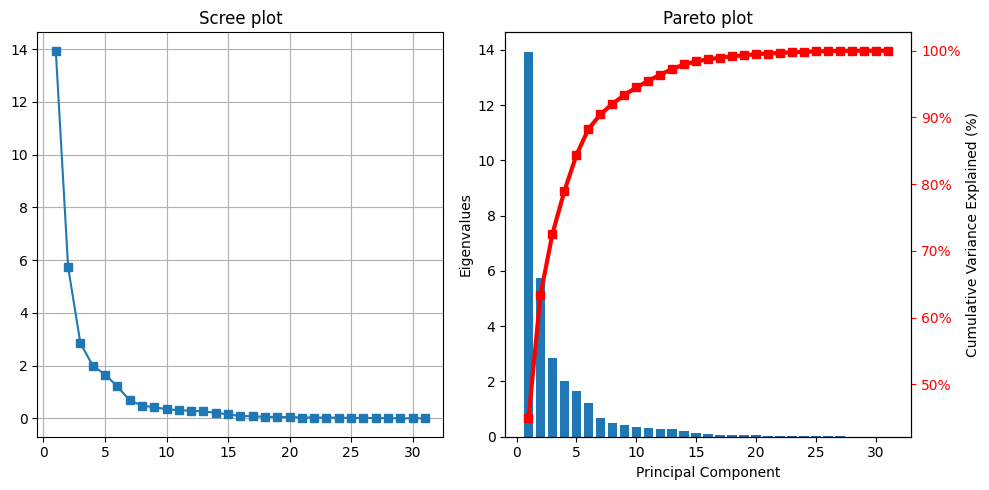

In [15]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Assuming you already have defined ratings_ and calculated s_x_npfun
s_x_npfun = np.cov(ratings_[:, 0:31].T, bias=False)
w, v = eig(s_x_npfun)
idx = np.argsort(w)[::-1]
eigvals = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with two subplots

# Scree plot
x = np.arange(1, 1+len(eigvals))
ax1.plot(x, eigvals, marker='s')
ax1.set_title('Scree plot')
ax1.grid(True)

# Pareto plot
ax2.bar(x, eigvals)
ax3 = ax2.twinx()
ax3.plot(x, eigvals.cumsum()/eigvals.sum()*100,
         marker='s', color='red', lw=3)
ax3.tick_params(axis='y', colors='red')
ax3.yaxis.set_major_formatter(PercentFormatter())
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Eigenvalues')
ax3.set_ylabel('Cumulative Variance Explained (%)')
ax2.set_title('Pareto plot')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**<font color=orange>對 3. 執行結果的觀察紀錄：</font>**
- 左圖為階梯圖。可以解釋為當主成分取的越多時，所能解釋的變異量將越少。約取到第三個主成分時，後續能解釋的變異量趨於平緩。
- 右圖為解釋變異量的累積百分比。代表需要取到約第五個主成分時，才能解釋到 80% 的變異量。

4. 每筆資料都有標籤值（label），代表腫瘤的成分（Malignant（惡性腫瘤）或 Benign（良性腫瘤））。假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散佈圖。是否可以從兩個主成分的散佈圖中看出兩個群組？請注意：資料是否先做標準化可能會影響結果，試著觀察「做與不做」標準化的差別。

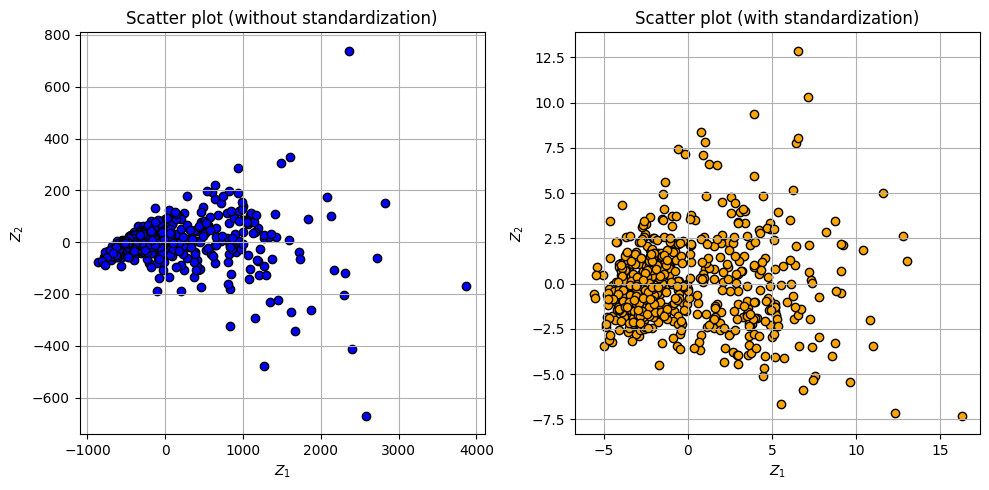

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = load_breast_cancer()
# 載入乳腺癌資料集
X = pd.DataFrame(data.data, columns=data.feature_names)
# 將特徵資料與目標值結合
df = pd.concat([X, pd.DataFrame({'target': y})], axis=1)

# Before standardization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(principal_components[:, 0], principal_components[:, 1], edgecolor='black',color='blue')  # Adding black outline
plt.title('Scatter plot (without standardization)')
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.grid(True)

# After standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

plt.subplot(1, 2, 2)
plt.scatter(principal_components[:, 0], principal_components[:, 1], edgecolor='black' ,color='orange')  # Adding black outline
plt.title('Scatter plot (with standardization)')
plt.xlabel('$Z_1$')  # 1st principal component
plt.ylabel('$Z_2$')  # 2nd principal component
plt.grid(True)

plt.tight_layout()
plt.show()

**<font color=orange>對 4. 執行結果的觀察紀錄：</font>**
- 圖分別為經未標準化與標準化後的比對，兩張散布圖都無法看出是否有惡性腫瘤。
- 左圖未標準化的散布圖藉由圖幅度可知離散程度大。

5. 再依據每筆資料的標籤，在散佈圖上塗上不同顏色（參考上題的圖）。

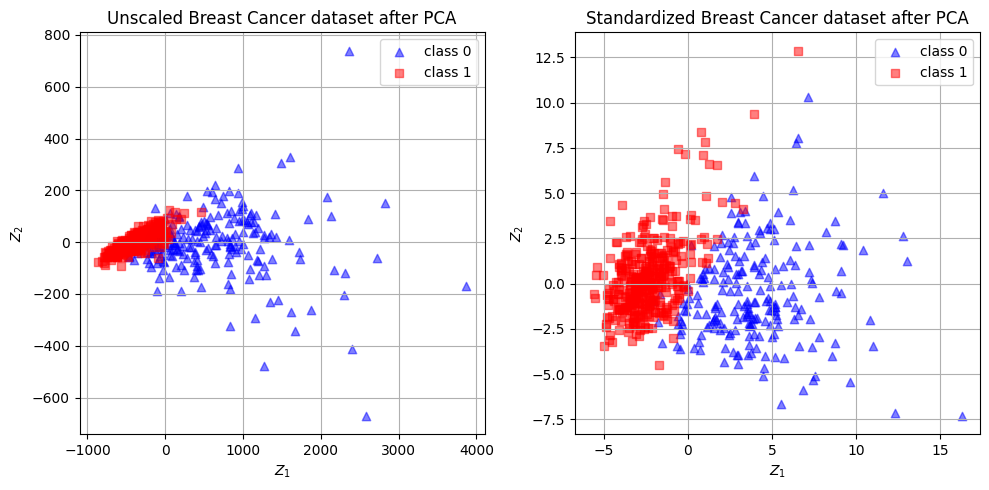

In [17]:
import pandas as pd
from sklearn.decomposition import PCA

bcdata_labels = df['target'] #python 不要以相同名稱覆蓋當作
bcdata = df.drop(columns=['df'], errors='ignore')

scaler = StandardScaler().set_output(transform="pandas")
scaled_bcdata = scaler.fit_transform(bcdata)
pca = PCA(n_components=2).fit(bcdata)
scaled_pca = PCA(n_components=2).fit(scaled_bcdata)
bcdata_transformed = pca.transform(bcdata)
bcdata_std_transformed = scaled_pca.transform(scaled_bcdata)


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
target_classes = range(0, 2)
colors = ("blue", "red")
markers = ("^", "s")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=bcdata_transformed[bcdata_labels == target_class, 0],
        y=bcdata_transformed[bcdata_labels == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=bcdata_std_transformed[bcdata_labels == target_class, 0],
        y=bcdata_std_transformed[bcdata_labels == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )
ax1.set_title("Unscaled Breast Cancer dataset after PCA")
ax2.set_title("Standardized Breast Cancer dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("$Z_1$")
    ax.set_ylabel("$Z_2$")
    ax.legend(loc="upper right")
    ax.grid()

_ = plt.tight_layout()
plt.show()

**<font color=orange>對 5. 執行結果的觀察紀錄：</font>**
- 加上標籤變數後，分群效果明顯。

6. 採三個主成分，繪製立體圖。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

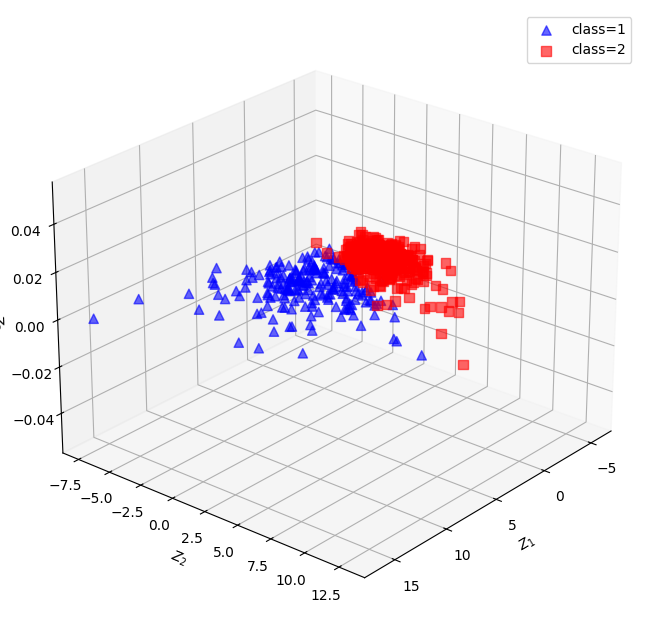

In [18]:
bcdata_array = np.array(df)

scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(bcdata_array)
# Apply transform to dataset.
ratings_ = scaler.transform(bcdata_array)
Sx = np.cov(ratings_[:, 0:31].T)
w, v = eig(Sx)
idx = np.argsort(w)[::-1]
eigvals = w[idx]
eigvecs = v[:, idx]
Z = eigvecs.T @ ratings_[:, 0:31].T

pca_fit = PCA().fit_transform(ratings_[:, 0:31])

# 定義座標軸
fig = plt.figure(figsize=(11, 8))
ax = plt.axes(projection='3d')
# 設置視圖角度
ax.view_init(elev=25, azim=40)  # 設置仰角為 20 度，方位角為 45 度

colors = ("blue", "red")
markers = ("^", "s")
labels = df.iloc[:, -1].unique()

for i, label in enumerate(labels):
    mask = df.iloc[:, -1] == label
    ax.scatter(pca_fit[mask, 0], pca_fit[mask, 1], alpha=0.6, label="class={}".format(
        i+1), color=colors[i], marker=markers[i], s=45)  # 生成散點.利用c控制顏色序列,s控制大小
ax.set_xlabel('$Z_1$')
ax.set_ylabel('$Z_2$')
ax.set_zlabel('$Z_3$')
ax.legend()
plt.show()


**<font color=orange>對 6. 執行結果的觀察紀錄：</font>**
- 立體圖的表達在資料點散布的表現上不是太好，重疊的資料點多。

7. $Z_1$ 與 $Z_2$ 都是從原變數組合而成的新變數，可否從 $Z_1$ 與 $Z_2$ 的組成係數，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。

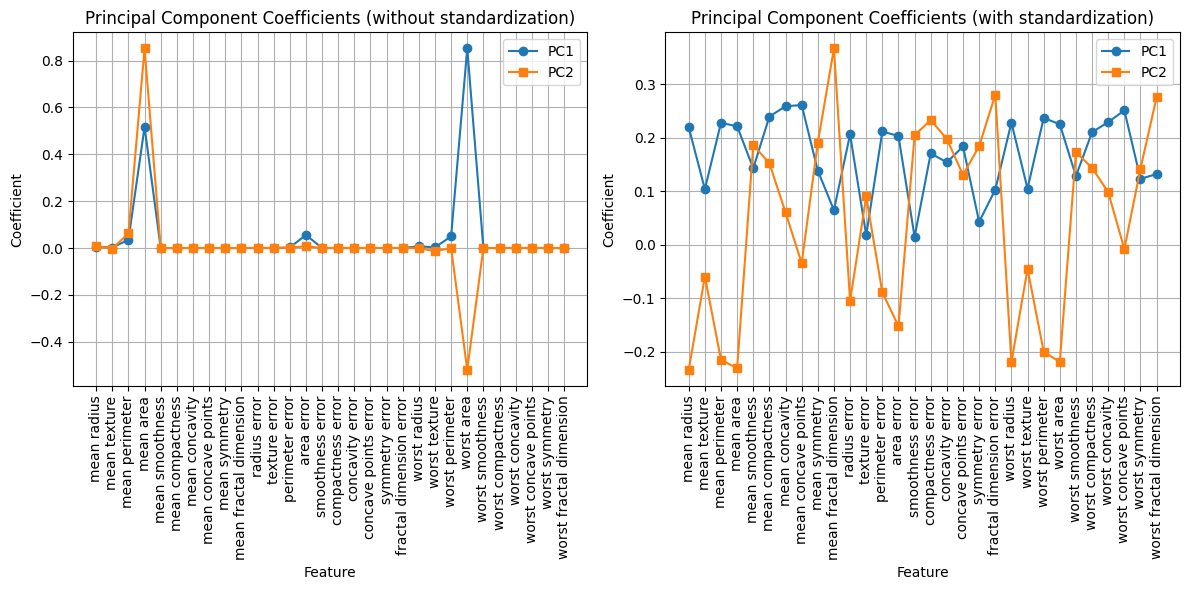

In [19]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
# 載入乳腺癌資料集
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
# 將特徵資料與目標值結合
df = pd.concat([X, pd.DataFrame({'target': y})], axis=1)
bcdata = df.drop(columns=['target'], errors='ignore')

#pca
pca = PCA(n_components=2)
principal_components = pca.fit_transform(bcdata)

# Get the column names of your dataframe
feature_names = bcdata.columns.tolist()

# Plotting coefficients of the first two principal components
plt.figure(figsize=(12, 6))

# Before standardization
plt.subplot(1, 2, 1)
plt.plot(feature_names, pca.components_[0], marker='o', label='PC1')
plt.plot(feature_names, pca.components_[1], marker='s', label='PC2')
plt.title('Principal Component Coefficients (without standardization)')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)

# After standardization
scaler = StandardScaler()
bcdata_scaled = scaler.fit_transform(bcdata)
#pca
pca = PCA(n_components=2)
principal_components = pca.fit_transform(bcdata_scaled)
pca.fit(bcdata_scaled)

plt.subplot(1, 2, 2)
plt.plot(feature_names, pca.components_[0], marker='o', label='PC1')
plt.plot(feature_names, pca.components_[1], marker='s', label='PC2')
plt.title('Principal Component Coefficients (with standardization)')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 提取經標準化後的第一和第二主成分的變數權重
PC1_weights = pca.components_[0]
PC2_weights = pca.components_[1]

# 將權重轉換為 DataFrame
weights_df = pd.DataFrame({'PC1_weights': PC1_weights, 'PC2_weights': PC2_weights}, index=bcdata.columns.tolist())

# 顯示結果
print("經標準化後的第一主成分和第二主成分的變數權重:")
print(weights_df)


經標準化後的第一主成分和第二主成分的變數權重:
                         PC1_weights  PC2_weights
mean radius                 0.218902    -0.233857
mean texture                0.103725    -0.059706
mean perimeter              0.227537    -0.215181
mean area                   0.220995    -0.231077
mean smoothness             0.142590     0.186113
mean compactness            0.239285     0.151892
mean concavity              0.258400     0.060165
mean concave points         0.260854    -0.034768
mean symmetry               0.138167     0.190349
mean fractal dimension      0.064363     0.366575
radius error                0.205979    -0.105552
texture error               0.017428     0.089980
perimeter error             0.211326    -0.089457
area error                  0.202870    -0.152293
smoothness error            0.014531     0.204430
compactness error           0.170393     0.232716
concavity error             0.153590     0.197207
concave points error        0.183417     0.130322
symmetry error            

In [21]:
# 將權重的絕對值排序
sorted_PC1_weights = weights_df['PC1_weights'].abs().sort_values(ascending=False)
sorted_PC2_weights = weights_df['PC2_weights'].abs().sort_values(ascending=False)

# 列印排序後的結果
print("經標準化後的第一主成分的變數權重 (絕對值由大到小):")
print(sorted_PC1_weights)

print("\n經標準化後的第二主成分的變數權重 (絕對值由大到小):")
print(sorted_PC2_weights)

經標準化後的第一主成分的變數權重 (絕對值由大到小):
mean concave points        0.260854
mean concavity             0.258400
worst concave points       0.250886
mean compactness           0.239285
worst perimeter            0.236640
worst concavity            0.228768
worst radius               0.227997
mean perimeter             0.227537
worst area                 0.224871
mean area                  0.220995
mean radius                0.218902
perimeter error            0.211326
worst compactness          0.210096
radius error               0.205979
area error                 0.202870
concave points error       0.183417
compactness error          0.170393
concavity error            0.153590
mean smoothness            0.142590
mean symmetry              0.138167
worst fractal dimension    0.131784
worst smoothness           0.127953
worst symmetry             0.122905
worst texture              0.104469
mean texture               0.103725
fractal dimension error    0.102568
mean fractal dimension     0.064363


**<font color=orange>對 7. 執行結果的觀察紀錄：</font>**
- 未經標準化的圖中看主成分變數權重，兩個主成分在變數 worst area 有負相關性。
- 經過標準化後的兩個主成分變數權重差異較大的變數有 mean radius、mean perimeter、mean area 和 worst radius、worst perimeter、worst area 。
- 代表兩個主成分的差別主因是上述的這些變數，但這些變數在相關係數圖中表示具有高度的相關性，推測主成分分析可以將互相具有高度相關性的變數拆解成新的主成分